In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Loading original and playground train data and concatenating them

In [2]:
data1 = pd.read_csv(r"C:\Users\basde\OneDrive\Documenten\GitHub\Code-and-examples\Projects\Extrovert vs. Introvert Behavior Data\Extrovert vs. Introvert Behavior Data\personality_dataset.csv")
data = pd.read_csv(r"C:\Users\basde\OneDrive\Documenten\GitHub\Code-and-examples\Projects\Extrovert vs. Introvert Behavior Data\playground-series-s5e7\train.csv")
# df = pd.concat([data1, data2], ignore_index=True)
df = data1.copy()

In [3]:
dfe = df.loc[df['Personality'] == 'Extrovert'].copy()
dfi = df.loc[df['Personality'] == 'Introvert'].copy()


In [4]:
# --- Justification for Imputation Strategy ---
# First, let's explore the relationship between 'Stage_fear' and 'Drained_after_socializing'
# We use crosstab to see the co-occurrence of their values, dropping rows where either is NaN.
observed_relationship = pd.crosstab(
    dfe['Stage_fear'],
    dfe['Drained_after_socializing'],
    dropna=True
)

print("Observed relationship between the two features:")
print(observed_relationship)

# We can also check the value counts for the non-null data to confirm the dominant pairs.
print("\nValue counts of non-null pairs:")
print(dfe[['Stage_fear', 'Drained_after_socializing']].dropna().value_counts(normalize=True))

Observed relationship between the two features:
Drained_after_socializing    No  Yes
Stage_fear                          
No                         1320    0
Yes                           0  111

Value counts of non-null pairs:
Stage_fear  Drained_after_socializing
No          No                           0.922432
Yes         Yes                          0.077568
Name: proportion, dtype: float64


In [5]:
dfi = pd.concat([dfi, dfe[dfe['Stage_fear'] == 'Yes']], ignore_index=True)
dfe = dfe[dfe['Stage_fear'] != 'Yes'].copy()

In [6]:
dfe = pd.concat([dfe, dfi[dfi['Stage_fear'] == 'No']], ignore_index=True)
dfi = dfi[dfi['Stage_fear'] != 'No'].copy()

Hier vul ik de stage_fear en drained after socializing aan volgens de waarde in de andere kolom.
Voor extrovert zet ik het eerst op ja voor ja, indien er geen informatie is zet ik het op Nee wat de meest voorkomende is.
Voor introvert draai ik dit om.

In [7]:
dfe['Stage_fear'] = dfe['Stage_fear'].fillna(dfe['Drained_after_socializing'].map({'Yes': 'Yes'}).fillna('No'))
dfe['Drained_after_socializing'] = dfe['Drained_after_socializing'].fillna(dfe['Stage_fear'].map({'Yes': 'Yes'}).fillna('No'))

In [8]:
dfi['Stage_fear'] = dfi['Stage_fear'].fillna(dfi['Drained_after_socializing'].map({'No': 'No'}).fillna('Yes'))
dfi['Drained_after_socializing'] = dfi['Drained_after_socializing'].fillna(dfi['Stage_fear'].map({'No': 'No'}).fillna('Yes'))

In [17]:
dfe.groupby(['Stage_fear','Drained_after_socializing']).count()

,,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality
Stage_fear,Drained_after_socializing,,,,,,
No,No,1425,1430,1425,1419,1425,1459


Exploratory visualization

In [11]:
numeric_colse = dfe.select_dtypes(include=np.number).columns
numeric_colsi = dfi.select_dtypes(include=np.number).columns

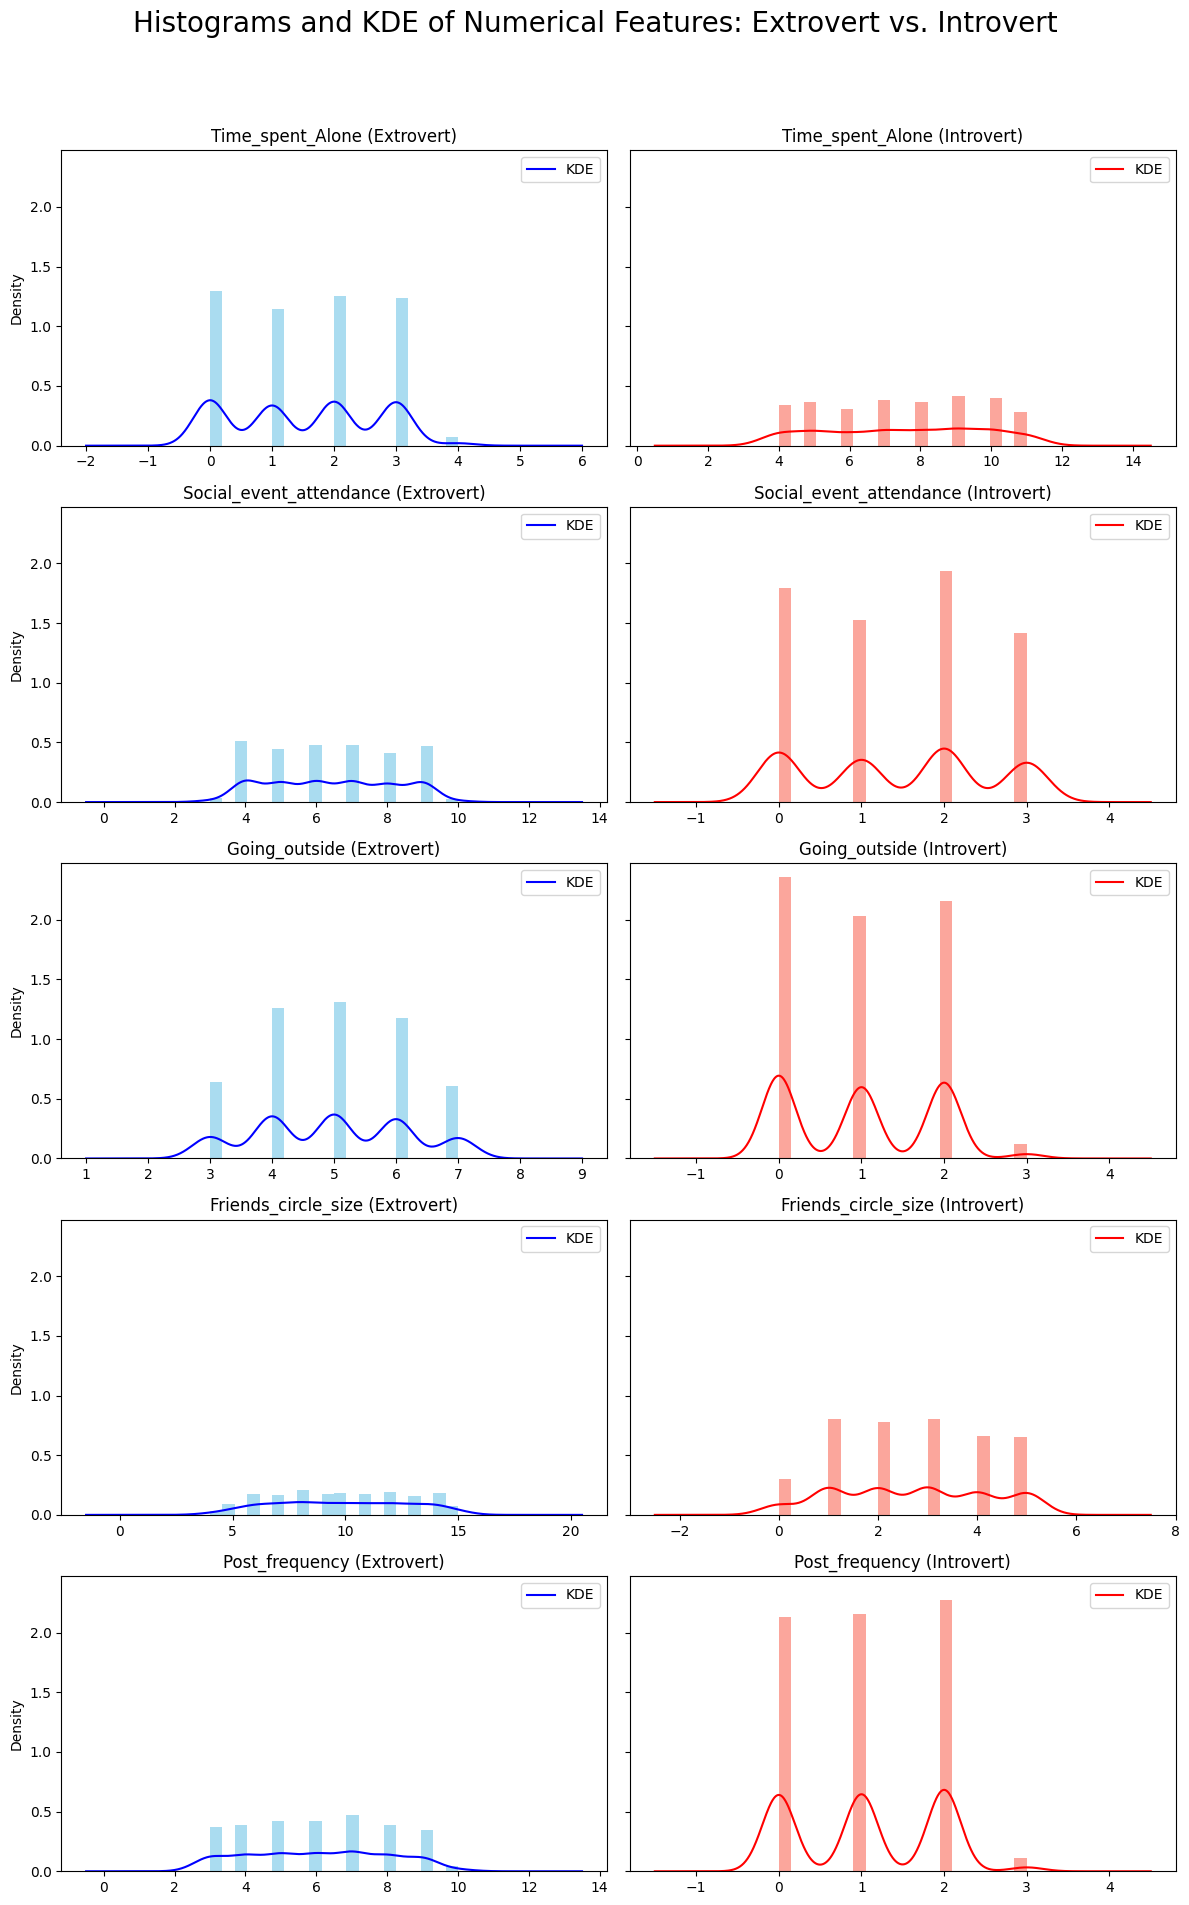

In [12]:
numeric_cols = dfe.select_dtypes(include=np.number).columns

# Create a figure and a grid of subplots. 5 rows, 2 columns.
# `sharey=True` makes the y-axis consistent for easier comparison.
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=2, figsize=(12, 20), sharey=True)

# Add a main title to the entire figure
fig.suptitle('Histograms and KDE of Numerical Features: Extrovert vs. Introvert', fontsize=20)

# Iterate through each numeric column and the corresponding row of axes
for i, col in enumerate(numeric_cols):
    # --- Left Plot: Extrovert Dataframe (dfe) ---
    ax_left = axes[i, 0]
    # Plot histogram
    dfe[col].hist(bins=20, ax=ax_left, grid=False, density=True, color='skyblue', alpha=0.7)
    # Overlay KDE plot
    dfe[col].plot(kind='kde', ax=ax_left, color='blue', label='KDE')
    ax_left.set_title(f'{col} (Extrovert)')
    ax_left.set_ylabel('Density')
    ax_left.legend()


    # --- Right Plot: Introvert Dataframe (dfi) ---
    ax_right = axes[i, 1]
    # Plot histogram
    dfi[col].hist(bins=20, ax=ax_right, grid=False, density=True, color='salmon', alpha=0.7)
    # Overlay KDE plot
    dfi[col].plot(kind='kde', ax=ax_right, color='red', label='KDE')
    ax_right.set_title(f'{col} (Introvert)')
    ax_right.legend()

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plots
plt.show()

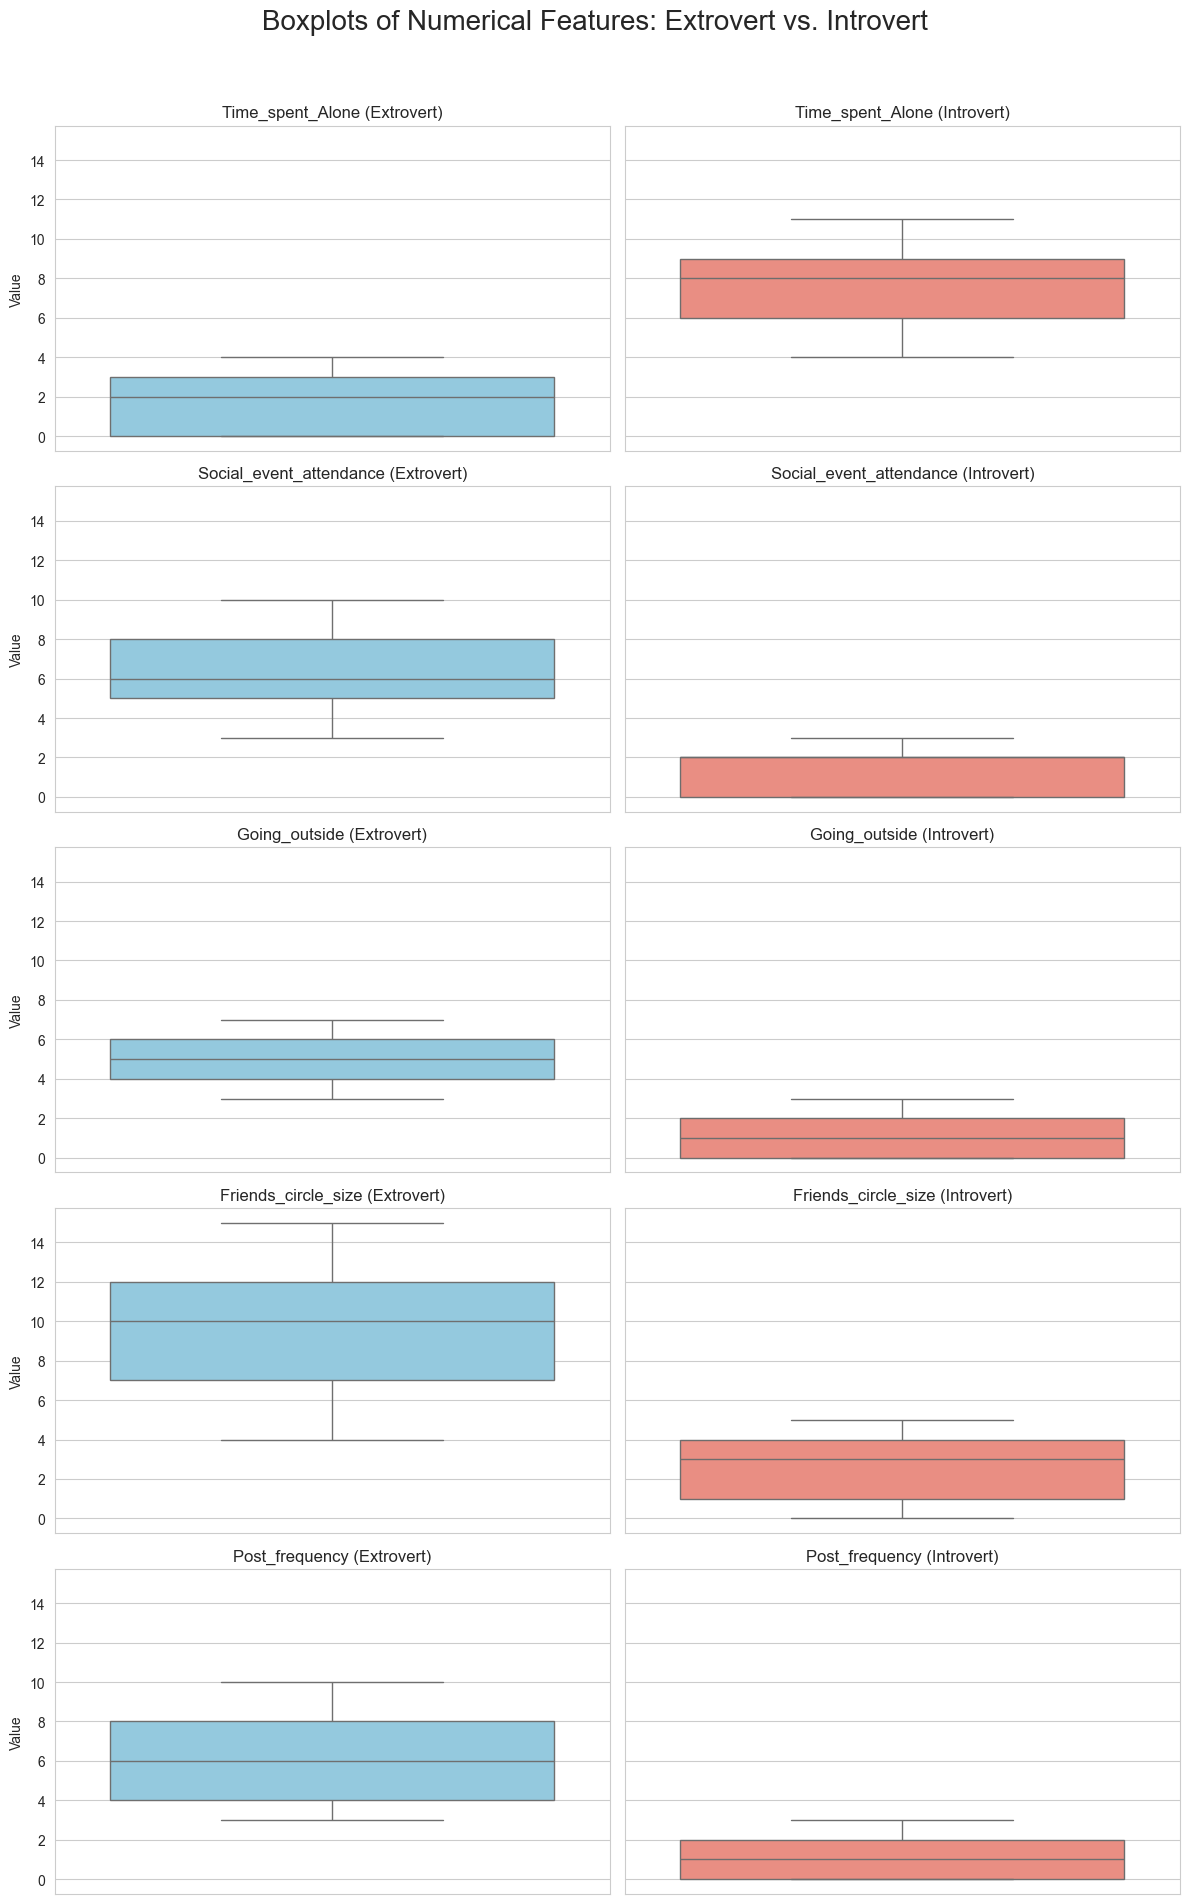

In [13]:
sns.set_style("whitegrid")


# Create a figure and a grid of subplots. 5 rows, 2 columns.
# `sharey=True` makes the y-axis consistent for easier comparison.
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=2, figsize=(12, 20), sharey=True)

# Add a main title to the entire figure
fig.suptitle('Boxplots of Numerical Features: Extrovert vs. Introvert', fontsize=20)

# Iterate through each numeric column and the corresponding row of axes
for i, col in enumerate(numeric_cols):
    # --- Left Plot: Extrovert Dataframe (dfe) ---
    ax_left = axes[i, 0]
    sns.boxplot(y=dfe[col], ax=ax_left, color='skyblue')
    ax_left.set_title(f'{col} (Extrovert)')
    ax_left.set_ylabel('Value') # Set a y-axis label

    # --- Right Plot: Introvert Dataframe (dfi) ---
    ax_right = axes[i, 1]
    sns.boxplot(y=dfi[col], ax=ax_right, color='salmon')
    ax_right.set_title(f'{col} (Introvert)')
    ax_right.set_ylabel('') # Hide y-label for the right plot for a cleaner look

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.96])

# Display the plots
plt.show()

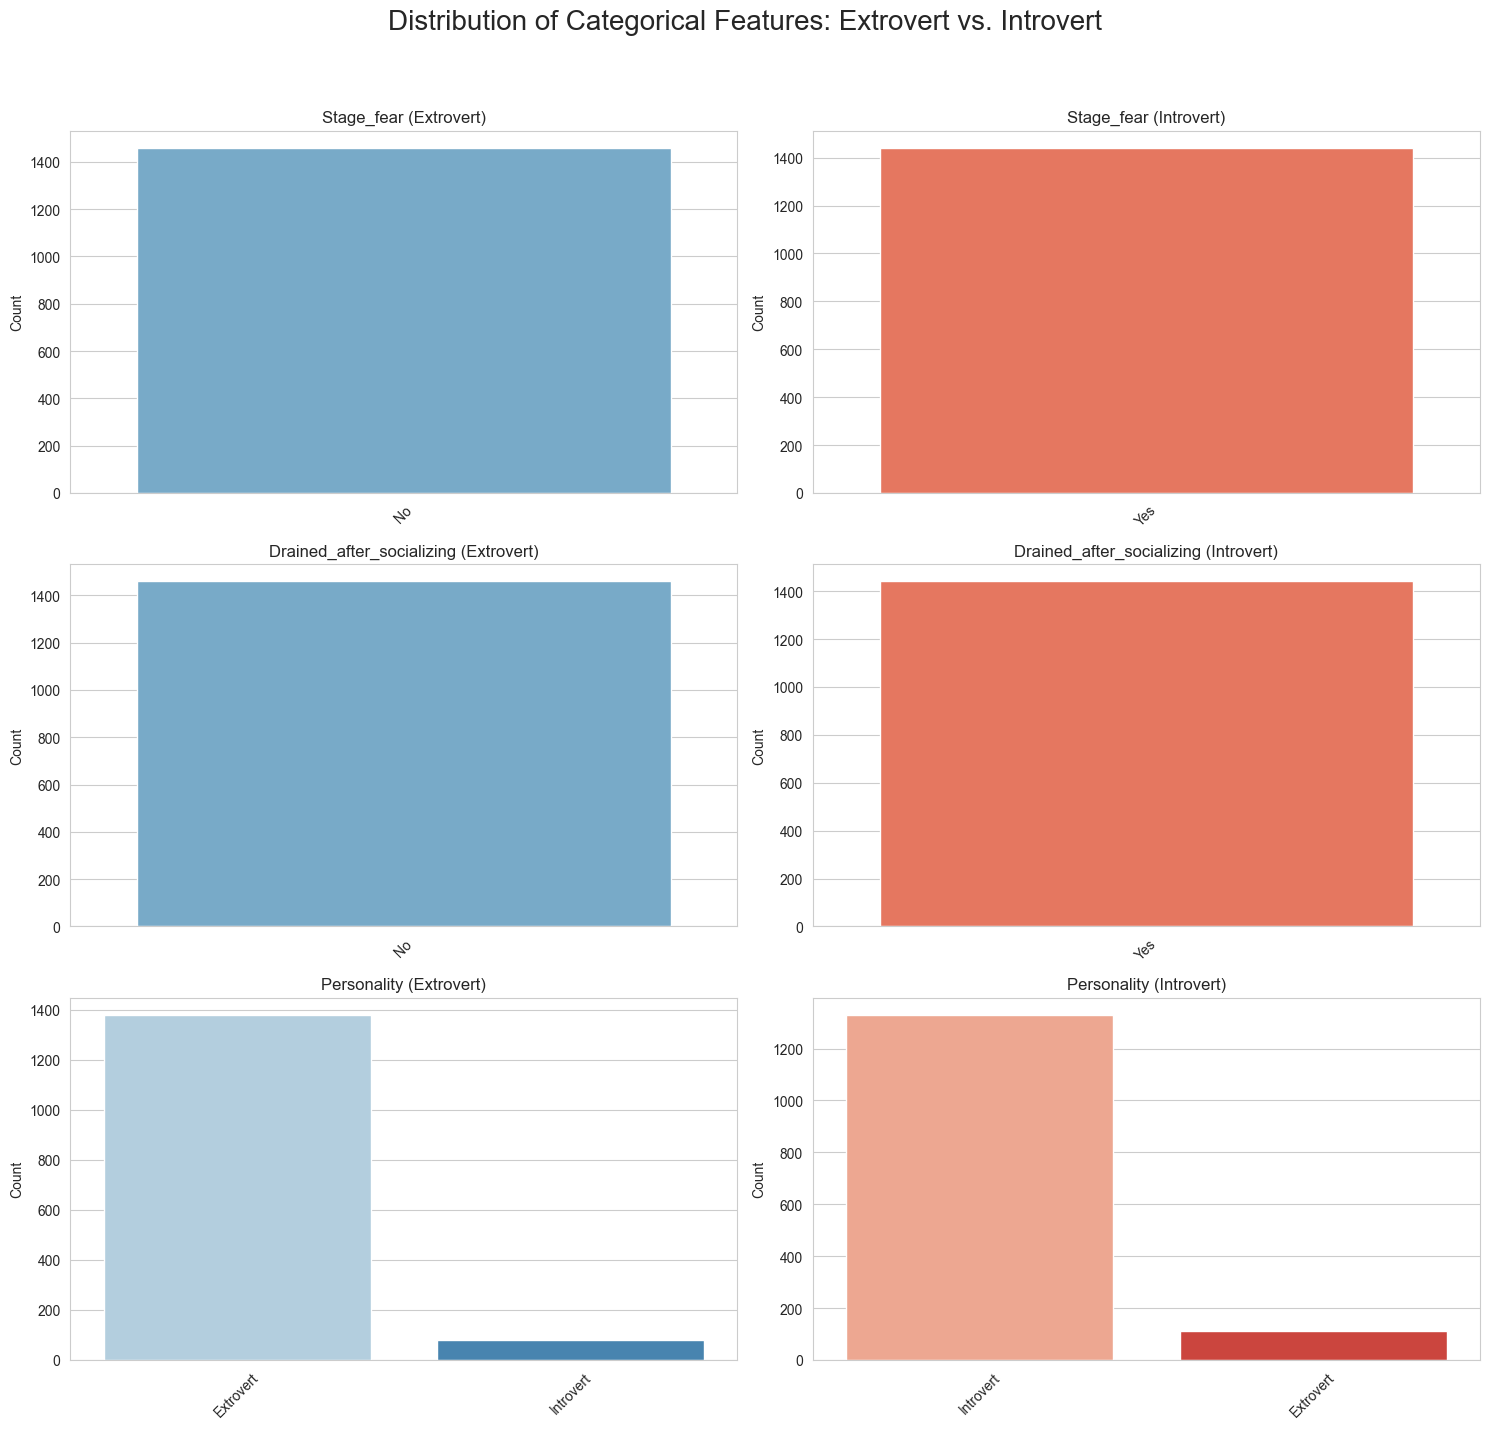

In [18]:
categorical_cols = dfe.select_dtypes(include=['object', 'category']).columns

# Create a figure and a grid of subplots.
fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=2, figsize=(15, len(categorical_cols) * 5), squeeze=False)

# Add a main title to the entire figure
fig.suptitle('Distribution of Categorical Features: Extrovert vs. Introvert', fontsize=20)

# Loop through each categorical column and create a count plot
for i, col in enumerate(categorical_cols):
    # --- Left Plot: Extrovert Dataframe (dfe) ---
    ax_left = axes[i, 0]
    # Handle NaN values by filling with a placeholder
    series_extrovert = dfe[col].fillna('Missing')
    # Create plot order based on value counts
    order_extrovert = series_extrovert.value_counts().index
    # Assigning x to hue and setting legend=False to avoid FutureWarning
    sns.countplot(x=series_extrovert, ax=ax_left, hue=series_extrovert, palette="Blues", order=order_extrovert, legend=False)
    ax_left.set_title(f'{col} (Extrovert)')
    ax_left.set_xlabel('')
    ax_left.set_ylabel('Count')
    ax_left.tick_params(axis='x', rotation=45)

    # --- Right Plot: Introvert Dataframe (dfi) ---
    ax_right = axes[i, 1]
    # Handle NaN values by filling with a placeholder
    series_introvert = dfi[col].fillna('Missing')
    # Create plot order based on value counts
    order_introvert = series_introvert.value_counts().index
    # Assigning x to hue and setting legend=False to avoid FutureWarning
    sns.countplot(x=series_introvert, ax=ax_right, hue=series_introvert, palette="Reds", order=order_introvert, legend=False)
    ax_right.set_title(f'{col} (Introvert)')
    ax_right.set_xlabel('')
    ax_right.set_ylabel('Count')
    ax_right.tick_params(axis='x', rotation=45)

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plots
plt.show()

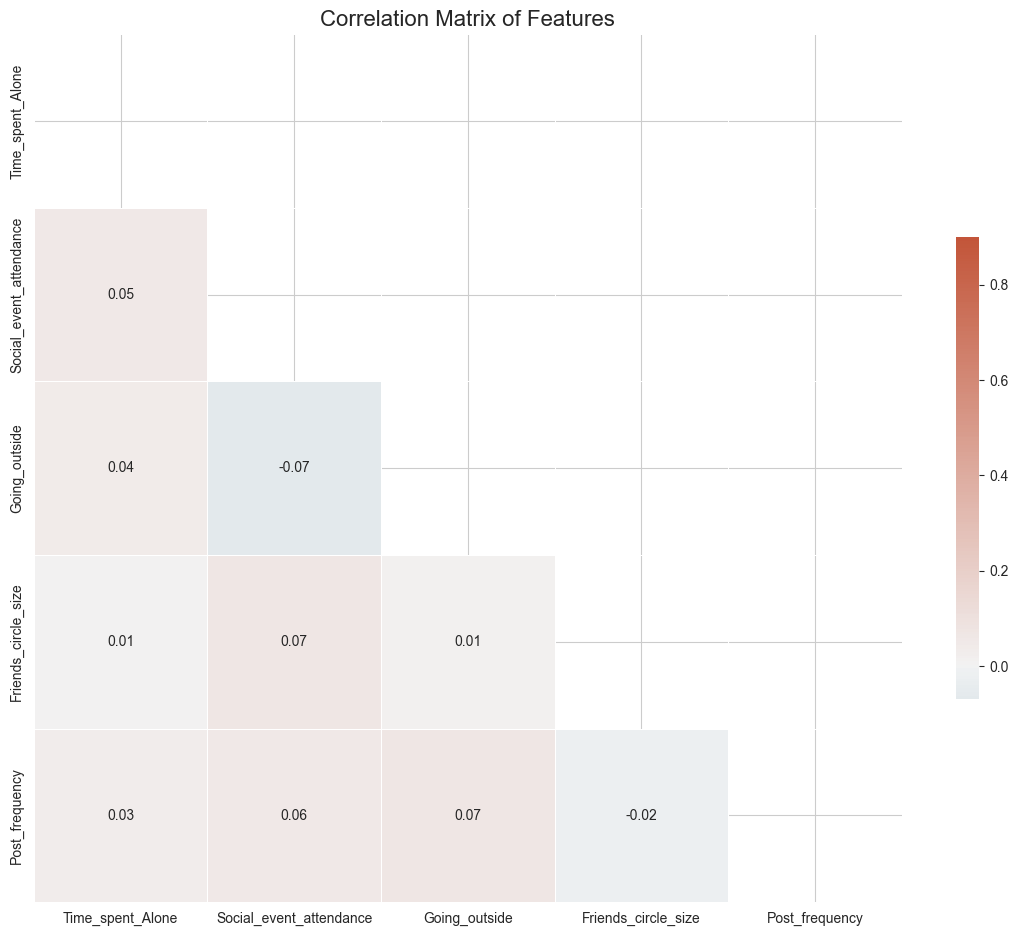

In [22]:
# Compute the correlation matrix for numerical features only
correlation_matrix = dfe.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":.5}, annot=True, fmt=".2f")

plt.title('Correlation Matrix of Features', size=16)
plt.show()

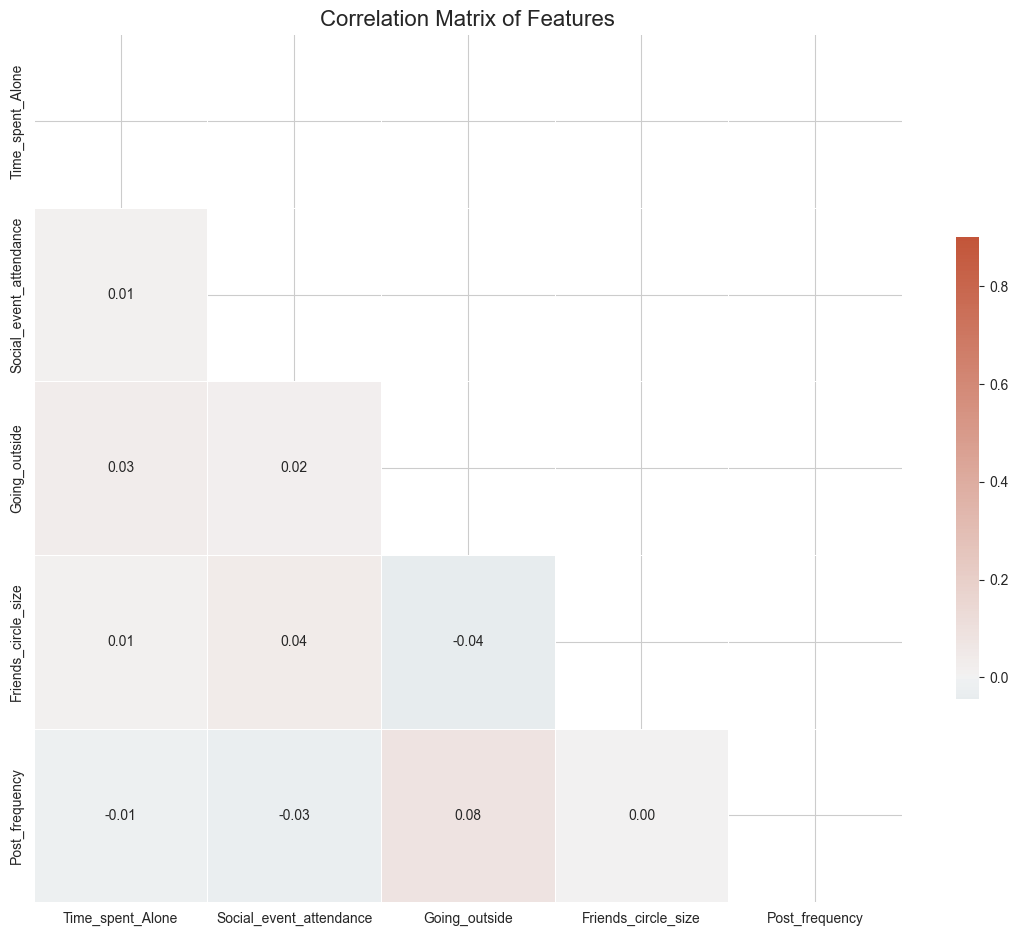

In [30]:
# Compute the correlation matrix for numerical features only
correlation_matrix = dfi.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":.5}, annot=True, fmt=".2f")

plt.title('Correlation Matrix of Features', size=16)
plt.show()

In [31]:
dfi.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000
mean,7.519778,1.460097,1.006940,2.677307,1.052741
std,2.212290,1.090984,0.857131,1.525011,0.841622
min,4.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,1.000000,0.000000
50%,8.000000,2.000000,1.000000,3.000000,1.000000
75%,9.000000,2.000000,2.000000,4.000000,2.000000
max,11.000000,3.000000,3.000000,5.000000,3.000000


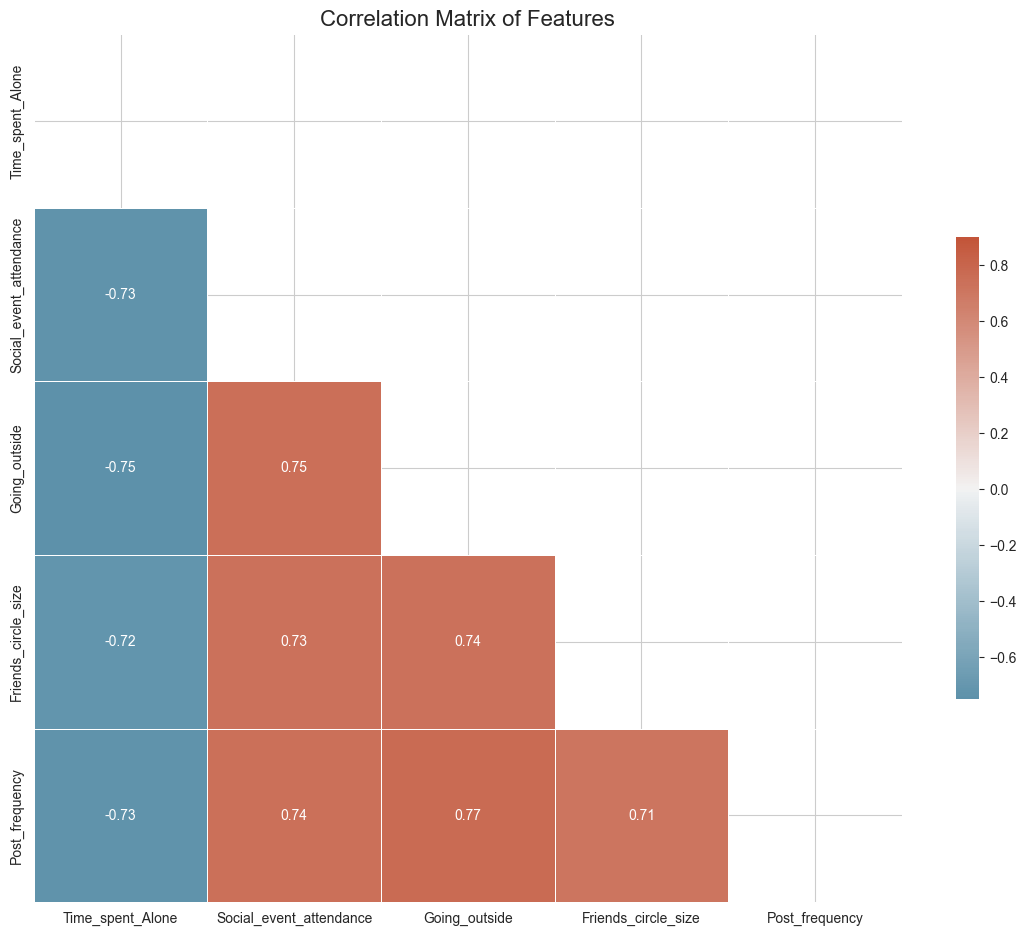

In [21]:
# Compute the correlation matrix for numerical features only
correlation_matrix = df.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":.5}, annot=True, fmt=".2f")

plt.title('Correlation Matrix of Features', size=16)
plt.show()

In [32]:
display(dfe.describe(include="all").T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Time_spent_Alone,1459.0,NaN,NaN,NaN,1.540096,1.149463,0.0,0.0,2.0,3.0,4.0
Social_event_attendance,1459.0,NaN,NaN,NaN,6.431803,1.763827,3.0,5.0,6.0,8.0,10.0
Going_outside,1459.0,NaN,NaN,NaN,4.971213,1.206063,3.0,4.0,5.0,6.0,7.0
Drained_after_socializing,1459,1,No,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Friends_circle_size,1459.0,NaN,NaN,NaN,9.835504,2.914478,4.0,7.5,10.0,12.0,15.0
Post_frequency,1459.0,NaN,NaN,NaN,6.047978,1.954321,3.0,4.0,6.0,8.0,10.0


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
imputer = IterativeImputer(max_iter=10, random_state=42)

In [40]:
dfi = dfi.drop('Stage_fear', axis=1)
dfe = dfe.drop('Stage_fear', axis=1)
dfi = dfi.drop('Drained_after_socializing', axis=1)
dfe = dfe.drop('Drained_after_socializing', axis=1)


In [ ]:
dfi.columns

In [36]:
dfe = dfe.drop('Personality',axis=1)
dfi = dfi.drop('Personality',axis=1)

KeyError: "['Personality'] not found in axis"

In [37]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dfi)

In [43]:
chi_square_value, p_value = calculate_bartlett_sphericity(X_scaled)
print(f"Bartlett's Test Chi-Square: {chi_square_value:.3f}, P-value: {p_value:.3f}")
if p_value < 0.05:
    print("Result: The variables are correlated, and the data is suitable for factor analysis.")
else:
    print("Result: The variables are not correlated enough. Factor analysis may not be appropriate.")

print("\n" + "="*40 + "\n")

# 2. KMO Test
kmo_all, kmo_model = calculate_kmo(X_scaled)
print(f"KMO Test value: {kmo_model:.3f}")
if kmo_model >= 0.6:
    print("Result: The data is adequate for factor analysis.")
elif kmo_model >= 0.5:
    print("Result: The data is marginally acceptable for factor analysis.")
else:
    print("Result: The data is not adequate for factor analysis.")

Bartlett's Test Chi-Square: 17.671, P-value: 0.061
Result: The variables are not correlated enough. Factor analysis may not be appropriate.


KMO Test value: 0.482
Result: The data is not adequate for factor analysis.


todo: change wrongly placed extroverts and introverts with the other.
remove categorical variables, because the ml model might place to much weight here. look into methods that dont have this issue.
use cv to check performance
check playground data